In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('btc_day.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2479,2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282
2480,2021-07-06,33723.507812,35038.535156,33599.917969,34235.195312,34235.195312,26501259870
2481,2021-07-07,34225.679688,34997.664062,33839.289062,33855.328125,33855.328125,24796027477
2482,2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,32877.371094,29910396946


In [3]:
df.shape

(2484, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2.484000e+03
mean,8004.767259,8234.054778,7749.560913,8016.880242,8016.880242,1.295561e+10
std,12024.187508,12401.154351,11574.757820,12031.850422,12031.850422,1.982770e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,528.222504,542.398010,518.541245,531.049484,531.049484,6.944417e+07
50%,4510.564941,4628.080078,4348.054932,4572.034912,4572.034912,4.142622e+09
75%,9291.430420,9452.106445,9139.054688,9296.048584,9296.048584,1.955353e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2484 non-null   object 
 1   Open       2484 non-null   float64
 2   High       2484 non-null   float64
 3   Low        2484 non-null   float64
 4   Close      2484 non-null   float64
 5   Adj Close  2484 non-null   float64
 6   Volume     2484 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 136.0+ KB


In [6]:
df['Date'] = pd.to_datetime(df.Date, errors='coerce')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2479,2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282
2480,2021-07-06,33723.507812,35038.535156,33599.917969,34235.195312,34235.195312,26501259870
2481,2021-07-07,34225.679688,34997.664062,33839.289062,33855.328125,33855.328125,24796027477
2482,2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,32877.371094,29910396946


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

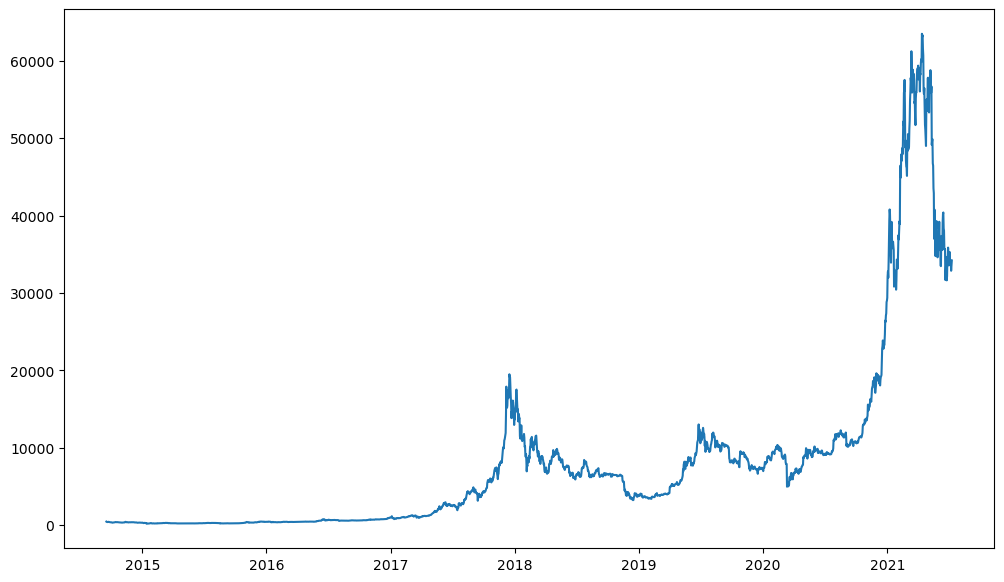

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df.Date, df.Close)

In [12]:
X = ['Open', 'High', 'Low', 'Volume']
y = 'Close'

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.25)

In [14]:
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)

x_train shape :  (1863, 4)
x_test shape :  (621, 4)


In [15]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [16]:
print(reg.coef_)
print(reg.intercept_)

[-5.37610841e-01  8.92439645e-01  6.40615774e-01 -1.11633281e-11]
2.121773221020703


In [17]:
predicted = reg.predict(x_test)
print(x_test)
print(predicted.shape)

              Open          High           Low       Volume
849     803.737000    829.000977    780.002991    168968000
1454   6301.569824   6374.979980   6292.759766   3714100000
1158   7697.209961   7884.990234   7463.439941   3667190016
1869   9422.462891   9426.874023   9085.370117  27706531577
709     577.752991    580.622986    576.857971     48856800
...            ...           ...           ...          ...
1622   3807.002441   3913.707275   3807.002441   9318796067
2049   7796.970215   7814.527344   7730.806641  33187959921
1188  19106.400391  19371.000000  18355.900391  14839499776
2284  22794.039062  23789.902344  22430.605469  44171632681
531     437.916992    439.653015    432.319000     74895800

[621 rows x 4 columns]
(621,)


In [18]:
past_df = pd.DataFrame({'Actual':y_test, 'predicted':predicted})
past_df.sort_index(inplace=True)

In [19]:
reg.score(x_test, y_test)

0.9995211591855044

In [20]:
import math

In [21]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error :  92.95134630752673


In [22]:
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, predicted))

Mean Squared Error :  61049.40943680177


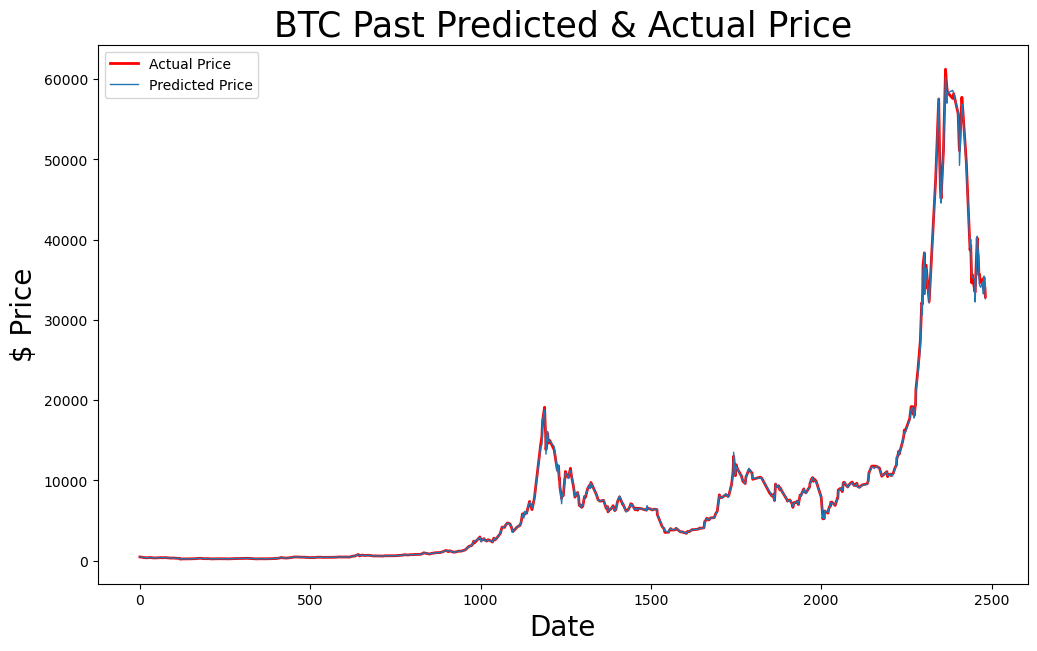

In [28]:
plt.figure(figsize = (12, 7))
plt.plot(past_df.index, past_df.Actual, color='red', lw=2, label="Actual Price")
plt.plot(past_df.index, past_df.predicted, lw=1, label="Predicted Price")
plt.title("BTC Past Predicted & Actual Price", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("$ Price", size=20)
plt.legend()
plt.show()

In [24]:
future_set = df.shift(periods=30).tail(30)

In [25]:
prediction = reg.predict(future_set[X])

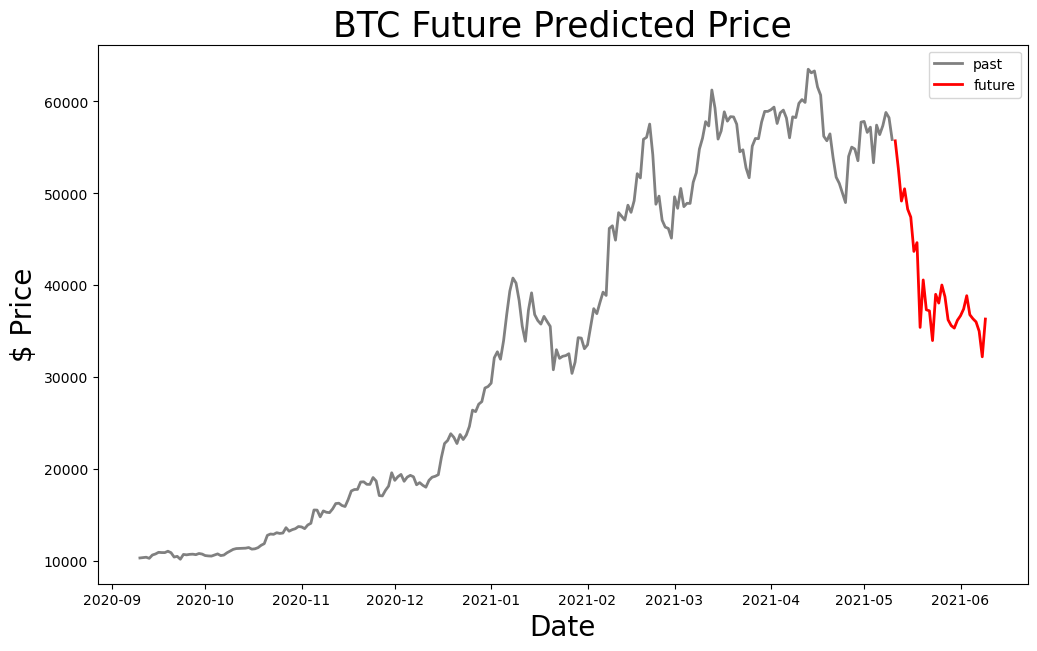

In [27]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"][-300:-60], df["Close"][-300:-60], color='gray', lw=2, label='past')
plt.plot(future_set["Date"], prediction, color='red', lw=2, label='future')
plt.title("BTC Future Predicted Price", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("$ Price", size=20)
plt.legend()
plt.show()